# Access to data in the cloud (GCS)

## Import modules and libraries

In [ ]:
import os, sys, urllib, tempfile
with tempfile.TemporaryDirectory() as tmpdirname:
    sys.path.append(tmpdirname)
    repo = "https://raw.githubusercontent.com/obidam/ds2-2023/main/"
    urllib.request.urlretrieve(os.path.join(repo, "utils.py"),
                               os.path.join(tmpdirname, "utils.py"))
    from utils import check_up_env
    check_up_env()

/tmp/tmpczj3b48x/utils.py:39: UserWarning: 
Running on Google Colab, this set-up can take a few minutes
Be aware that your changes won't be saved unless you save this Notebooks on your G-Drive
  warnings.warn(


In [ ]:
import numpy as np
import dask
import xarray as xr
import matplotlib.pyplot as plt
from intake import open_catalog

## Use intake catalog of data

The catalog also uses the gcsfs entry point, but with intake it's transparent to the user:

### Access and listing of the catalog

In [ ]:
catalog_url = 'https://raw.githubusercontent.com/obidam/ds2-2023/main/ds2_data_catalog.yml'
cat = open_catalog(catalog_url)
list(cat)

['argo_global_sdl',
 'argo_global_sdl_homogeneous',
 'argo_global_vertical_mean',
 'en4',
 'sea_surface_height']

### Connect to data

In [ ]:
ds = cat["en4"].to_dask()
print("Size of the dataset:", ds.nbytes/1e9,"Gb")
ds

Size of the dataset: 52.2317975 Gb


/usr/local/lib/python3.10/dist-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset>
Dimensions:                          (depth: 42, time: 832, bnds: 2, lat: 173,
                                      lon: 360)
Coordinates:
  * depth                            (depth) float32 5.022 15.08 ... 5.35e+03
  * lat                              (lat) float32 -83.0 -82.0 ... 88.0 89.0
  * lon                              (lon) float32 1.0 2.0 3.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 1950-01-16T12:00:0...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds                       (time, depth, bnds) float32 dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature                      (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(832, 2), meta=np.ndarray>
Attributes: (12/21)
    Conventions:            CF-1.0
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    GDS_version_id:         v1.7
    contact:                Simon Good - simon.good@metoffice.gov.uk
    creation_date:          2017-04-21 21:12:08.123 -00:00
    easternmost_longitude:  362.5
    ...                     ...
    start_date:             2001-01-01 UTC
    start_time:             00:00:00 UTC
    stop_date:              2001-01-01 UTC
    stop_time:              00:00:00 UTC
    title:                  Temperature and salinity analysis
    westernmost_longitude:  0.5

### Data exploration

In [ ]:
depth_bounds = (ds['depth'].min().values, ds['depth'].max().values)
lat_bounds = (ds['lat'].min().values, ds['lat'].max().values)
lon_bounds = (ds['lon'].min().values, ds['lon'].max().values)
time_bounds = (ds['time'].min().values, ds['time'].max().values)

print(f"Depth Bounds: {depth_bounds}")
print(f"Latitude Bounds: {lat_bounds}")
print(f"Longitude Bounds: {lon_bounds}")
print(f"Time Bounds: {time_bounds}")


Depth Bounds: (array(5.0215898, dtype=float32), array(5350.272, dtype=float32))
Latitude Bounds: (array(-83., dtype=float32), array(89., dtype=float32))
Longitude Bounds: (array(1., dtype=float32), array(360., dtype=float32))
Time Bounds: (numpy.datetime64('1950-01-16T12:00:00.000000000'), numpy.datetime64('2019-04-16T00:00:00.000000000'))


In [ ]:
depth_values =ds['depth'].values
depth_values

array([5.02158976e+00, 1.50785398e+01, 2.51604595e+01, 3.52782898e+01,
       4.54477615e+01, 5.56914940e+01, 6.60419846e+01, 7.65459137e+01,
       8.72702866e+01, 9.83111801e+01, 1.09806175e+02, 1.21951897e+02,
       1.35028549e+02, 1.49433731e+02, 1.65728455e+02, 1.84697464e+02,
       2.07425446e+02, 2.35386169e+02, 2.70534119e+02, 3.15374084e+02,
       3.72965454e+02, 4.46800934e+02, 5.40502197e+02, 6.57322937e+02,
       7.99549622e+02, 9.67995850e+02, 1.16180591e+03, 1.37866101e+03,
       1.61529053e+03, 1.86807068e+03, 2.13351709e+03, 2.40858350e+03,
       2.69078027e+03, 2.97816602e+03, 3.26927808e+03, 3.56304077e+03,
       3.85867627e+03, 4.15562793e+03, 4.45350195e+03, 4.75202100e+03,
       5.05098975e+03, 5.35027197e+03], dtype=float32)

### Calculatory funtions

$$Heat [J] = \rho [\frac{kg}{m^3}] \cdot C_p [\frac{J}{kg\cdot K}] \cdot T(x,y,z,t) [K] \cdot dV(x,y,z,t) [m^3]$$
$$$$
$$Heat = 1035 \cdot 4186 \cdot T(x,y,z,t) \cdot dV(x,y,z,t)$$

In [ ]:
R = 6371e3 # Earth radius

def volume_voxel(lat, height):
  radius_circle = R*np.cos(np.deg2rad(lat))
  circunf_circle = 2*np.pi*radius_circle
  length_1deg = circunf_circle/360

  area = length_1deg**2

  vol = area * height

  return vol

def calculate_heat_content(ds, t_index):
  heights = xr.concat([xr.DataArray([ds['depth'][0]], dims='depth',coords={'depth':[0]}), ds['depth'].diff('depth')], 'depth')

  # Calculate the volume of each voxel
  dV = volume_voxel(ds['lat'], heights)
  # Calculate the heat content for each voxel
  heat_content = 1035 * 4186 * ds['temperature'].isel(time=t_index) * dV

  return heat_content

def integrate_heat_over_depth(ds, t_index, max_depth=5500):
  selected_depth = ds.sel(depth=slice(0,max_depth))

  # Calculate the heat content for each voxel
  heat_content = calculate_heat_content(selected_depth, t_index)

  # Integrate (sum) over the depth dimension
  total_heat_content = heat_content.sum(dim='depth')

  return total_heat_content

def integrate_heat_over_depth_and_time(ds, max_depth=5500):
  selected_depth = ds.sel(depth=slice(0,max_depth))

  heights = xr.concat([xr.DataArray([ds['depth'][0]], dims='depth',coords={'depth':[0]}), selected_depth['depth'].diff('depth')], 'depth')

  # Calculate the volume of each voxel
  dV = volume_voxel(selected_depth['lat'], heights)
  # Calculate the heat content for each voxel
  heat_content = 1035 * 4186 * selected_depth['temperature'] * dV

  # Integrate (sum) over the depth and time dimensions
  total_heat_content_depth = heat_content.sum(dim='depth')
  total_heat_content_depth_time = total_heat_content_depth.sum(dim='time')


  return total_heat_content_depth_time

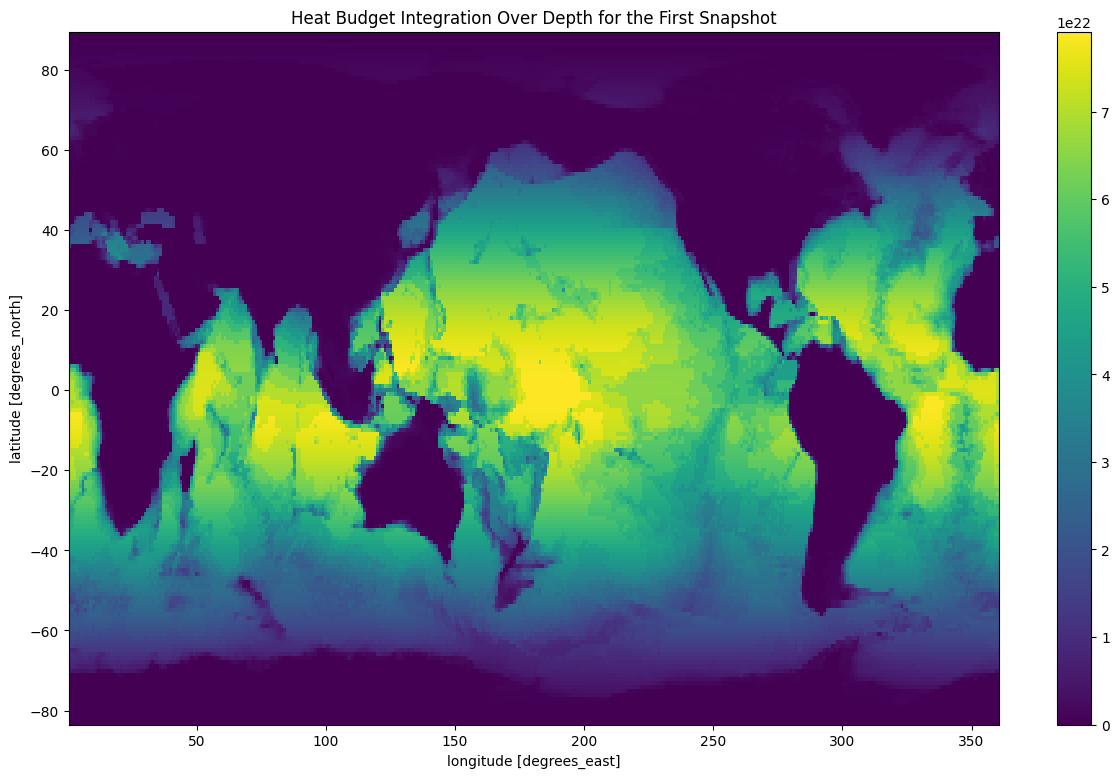

In [ ]:
# Use the functions
total_heat_content = integrate_heat_over_depth(ds, 0, max_depth=12e3)  # For the first snapshot

# Plot the result
plt.figure(figsize=(15, 9))
total_heat_content.plot()
plt.title('Heat Budget Integration Over Depth for the First Snapshot')
plt.show()

### Time series

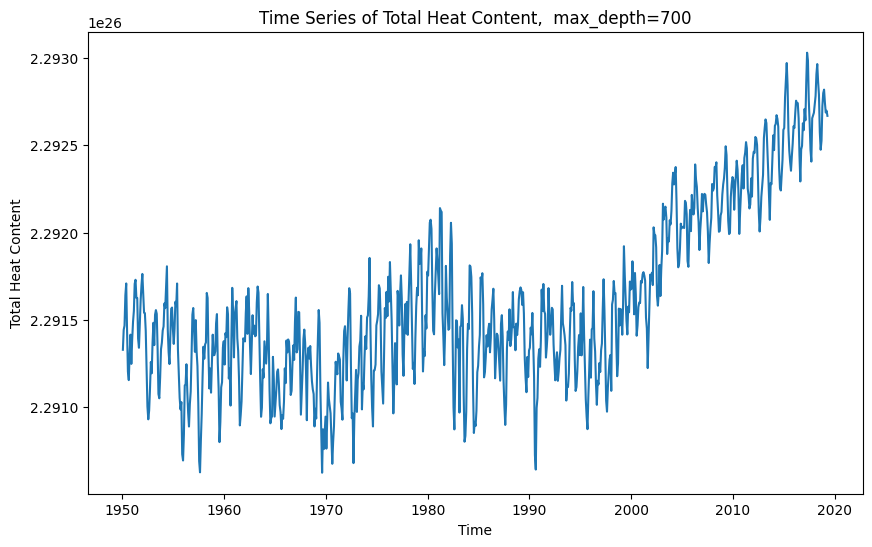

In [ ]:
max_depth = 700
# Calculate the total heat content for each snapshot and sum over latitude and longitude
total_heat_content_time_series = [integrate_heat_over_depth(ds, t, max_depth=max_depth).sum(dim=['lat', 'lon']) for t in range(len(ds['time']))]

# Convert the list to a DataArray for easier plotting
total_heat_content_time_series = xr.DataArray(total_heat_content_time_series, dims=['time'], coords={'time': ds['time']})

# Plot the time series
plt.figure(figsize=(10, 6))
total_heat_content_time_series.plot()
plt.title('Time Series of Total Heat Content,  max_depth='+str(int(max_depth)))
plt.xlabel('Time')
plt.ylabel('Total Heat Content')
plt.show()

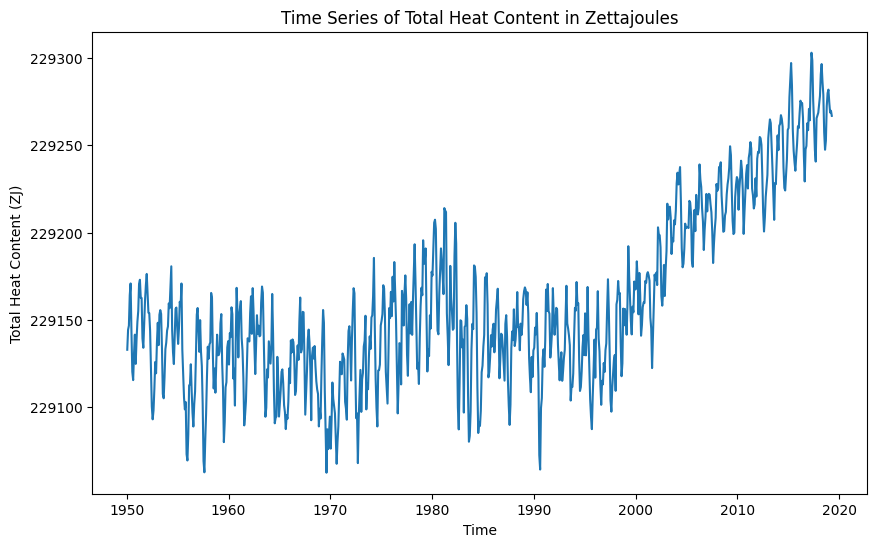

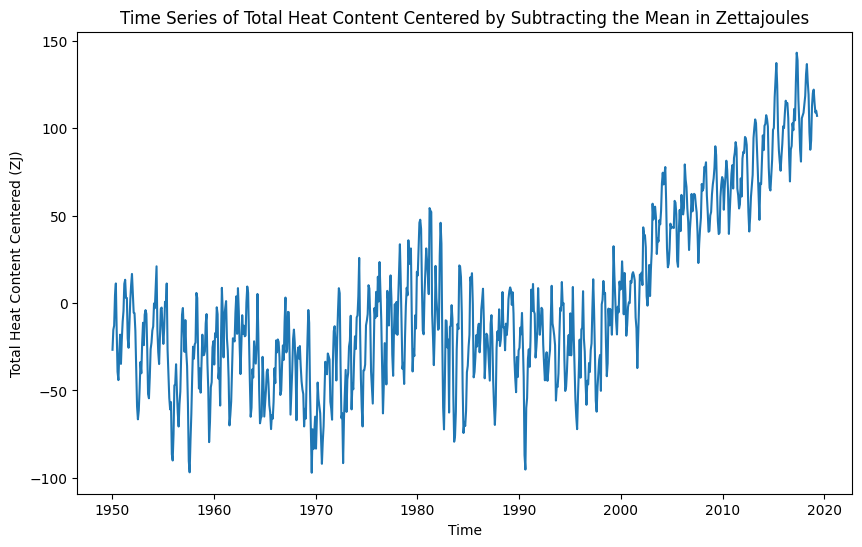

In [ ]:
# Convert total heat content from joules to zettajoules
total_heat_content_zj = total_heat_content_time_series / 1e21

# Plot the time series
plt.figure(figsize=(10, 6))
total_heat_content_zj.plot()
plt.title('Time Series of Total Heat Content in Zettajoules')
plt.xlabel('Time')
plt.ylabel('Total Heat Content (ZJ)')
plt.show()


# Calculate the mean of the time series
mean_heat_content = total_heat_content_zj.mean(dim='time')

# Subtract the mean from the original time series
total_heat_content_time_series_centered_zj = total_heat_content_zj - mean_heat_content

# Plot the centered time series
plt.figure(figsize=(10, 6))
total_heat_content_time_series_centered_zj.plot()
plt.title('Time Series of Total Heat Content Centered by Subtracting the Mean in Zettajoules')
plt.xlabel('Time')
plt.ylabel('Total Heat Content Centered (ZJ)')
plt.show()

### Regression and prediction


In [ ]:
from numpy import hstack, sin, cos, pi
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


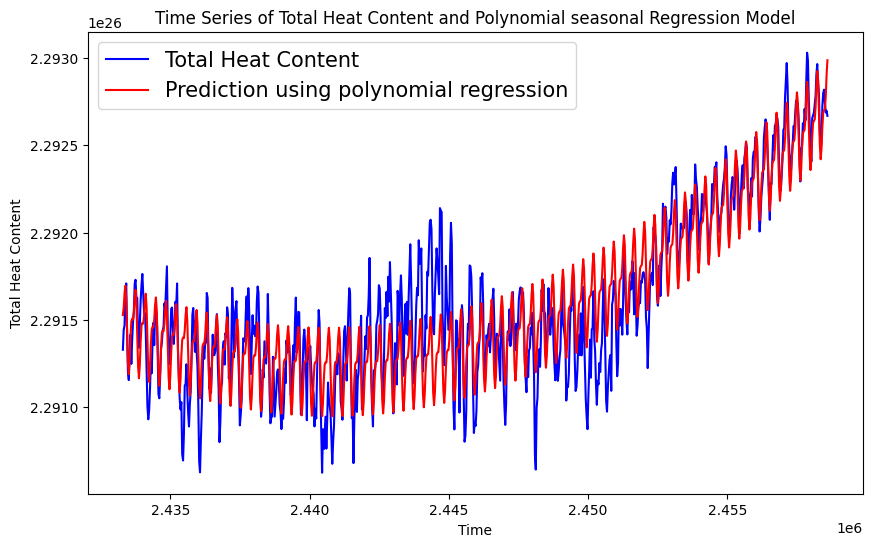

Polynomial Model rmse: 2.132489341581152e+22


In [ ]:
# Prepare the data
time = total_heat_content_time_series.time.to_pandas().index.to_julian_date().values.reshape(-1, 1)
heat_content = total_heat_content_time_series.values.reshape(-1, 1)

# Adjust regression
X = hstack((time, sin(2*pi*(1/365.25)*time), cos(2*pi*(1/365.25)*time)))
y = heat_content

# Define the polynomial model with a degree of 9
poly_model = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())

# Fit the model
poly_model.fit(X, y)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, y, '-b', label='Total Heat Content')
plt.plot(time, poly_model.predict(X), '-r', label='Prediction using polynomial regression')
plt.legend(prop={'size': 15})
plt.title('Time Series of Total Heat Content and Polynomial seasonal Regression Model')
plt.xlabel('Time')
plt.ylabel('Total Heat Content')
plt.show()

print(f'Polynomial Model rmse: {np.sqrt(((poly_model.predict(X) - y) ** 2).mean())}')


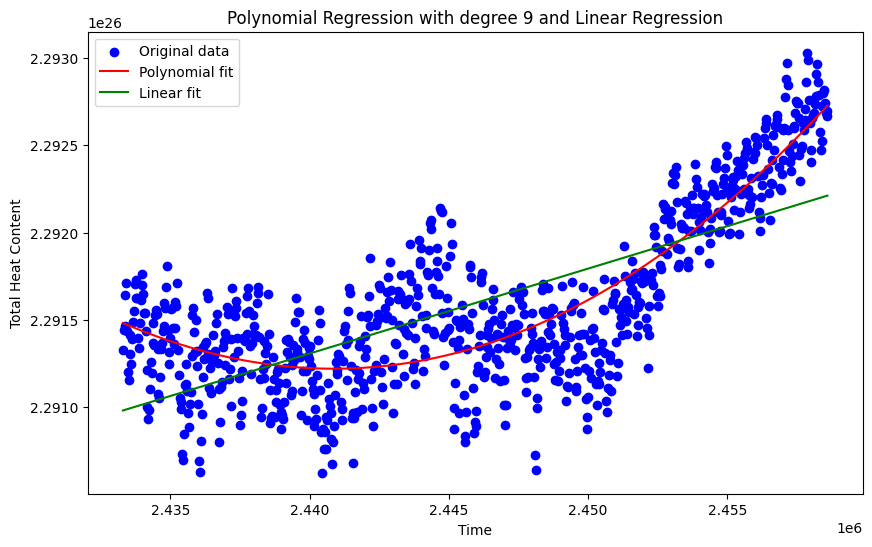

Polynomial Model rmse: 2.635391093598701e+22
Linear Model rmse: 3.486017195771006e+22


In [ ]:
# Prepare the data
time = total_heat_content_time_series.time.to_pandas().index.to_julian_date().values.reshape(-1, 1)
heat_content = total_heat_content_time_series.values.reshape(-1, 1)

# Transform the input array to include higher degree terms
poly = PolynomialFeatures(degree=9)
X_poly = poly.fit_transform(time)

# Fit the polynomial model
poly_model = LinearRegression().fit(X_poly, heat_content)

# Fit the linear model
linear_model = LinearRegression().fit(time, heat_content)

# Make predictions
y_pred_poly = poly_model.predict(X_poly)
y_pred_linear = linear_model.predict(time)

# Calculate the mean squared error
mse_poly = mean_squared_error(heat_content, y_pred_poly)
mse_linear = mean_squared_error(heat_content, y_pred_linear)

# Plot the original data and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(time, heat_content, color='blue', label='Original data')
plt.plot(time, y_pred_poly, color='red', label='Polynomial fit')
plt.plot(time, y_pred_linear, color='green', label='Linear fit')
plt.title('Polynomial Regression with degree 9 and Linear Regression')
plt.xlabel('Time')
plt.ylabel('Total Heat Content')
plt.legend()
plt.show()

# Print the mean squared error
print(f'Polynomial Model rmse: {np.sqrt(mse_poly)}')
print(f'Linear Model rmse: {np.sqrt(mse_linear)}')

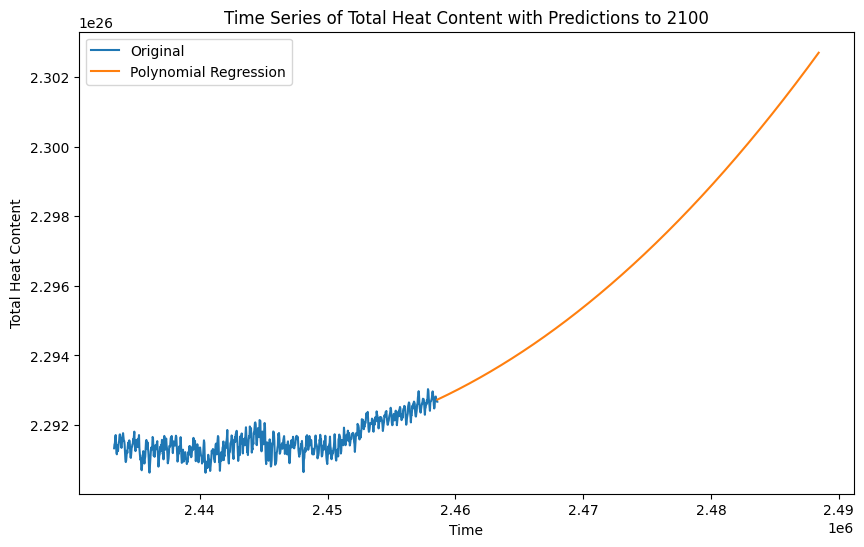

In [ ]:
import pandas as pd

# Prepare the data
X = total_heat_content_time_series.time.to_pandas().index.to_julian_date().values.reshape(-1, 1)  # Change here
y = total_heat_content_time_series.values

# Define the model with a degree of 9
poly_model = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())

# Fit the data to the model
poly_model.fit(X, y)

# Extend the time series to 2100
future_dates = pd.date_range(start=total_heat_content_time_series.time.values[-1], end='2100-12-31')
future_dates = future_dates.to_julian_date().values.reshape(-1, 1)  # Change here

# Make predictions
poly_future_predictions = poly_model.predict(future_dates)  # Change here

# Plot the original time series and the predictions
plt.figure(figsize=(10, 6))
plt.plot(total_heat_content_time_series.time.to_pandas().index.to_julian_date(), total_heat_content_time_series.values, label='Original')
plt.plot(future_dates, poly_future_predictions, label='Polynomial Regression')
plt.legend()
plt.title('Time Series of Total Heat Content with Predictions to 2100')
plt.xlabel('Time')
plt.ylabel('Total Heat Content')
plt.show()

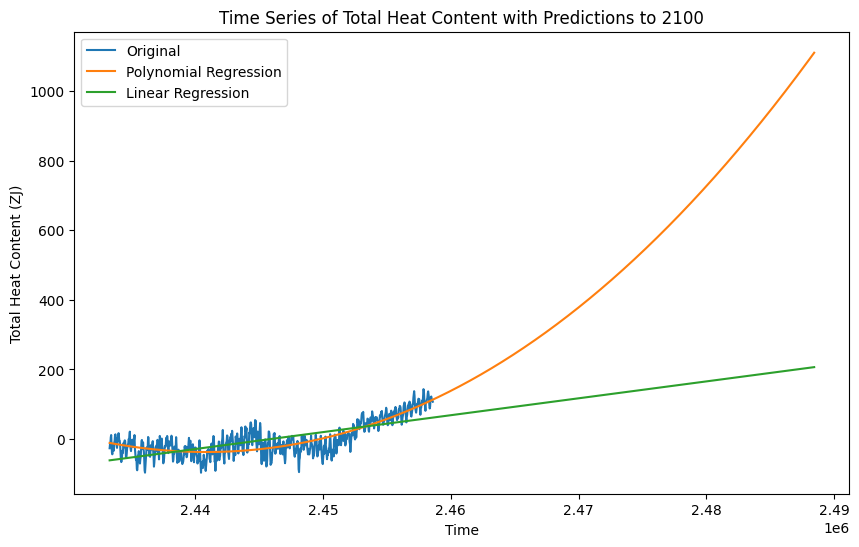

In [ ]:
# Prepare the data
X = total_heat_content_time_series.time.to_pandas().index.to_julian_date().values.reshape(-1, 1)
y = total_heat_content_time_series.values


# Define the polynomial model with a degree of 9
poly_model = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())

# Fit the data to the polynomial model
poly_model.fit(X, y)

# Define the linear model
linear_model = LinearRegression()

# Fit the data to the linear model
linear_model.fit(X, y)

# Extend the time series to 2100
future_dates = pd.date_range(start=total_heat_content_time_series.time.values[-1], end='2100-12-31')
future_dates = future_dates.to_julian_date().values.reshape(-1, 1)  # Change here

# Concatenate the original time and future dates
X_extended = np.concatenate((X, future_dates))

# Concatenate the original data and future predictions
y_poly_extended = poly_model.predict(X_extended) / 1e21
y_linear_extended = linear_model.predict(X_extended) / 1e21

# Plot the original time series, the polynomial predictions, and the linear predictions
plt.figure(figsize=(10, 6))
plt.plot(total_heat_content_time_series.time.to_pandas().index.to_julian_date(), total_heat_content_time_series.values/1e21 - np.mean(total_heat_content_time_series.values/1e21), label='Original')
plt.plot(X_extended, y_poly_extended- np.mean(total_heat_content_time_series.values/1e21), label='Polynomial Regression')
plt.plot(X_extended, y_linear_extended- np.mean(total_heat_content_time_series.values/1e21), label='Linear Regression')
plt.legend()
plt.title('Time Series of Total Heat Content with Predictions to 2100')
plt.xlabel('Time')
plt.ylabel('Total Heat Content (ZJ)')
plt.show()

### Global heatmap

[]

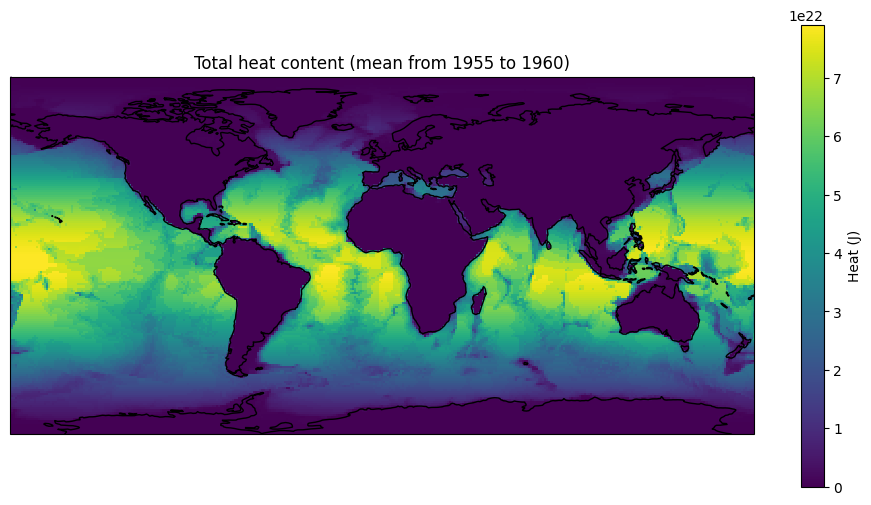

In [ ]:
heights = xr.concat([xr.DataArray([ds['depth'][0]], dims='depth',coords={'depth':[0]}), ds['depth'].diff('depth')], 'depth')

# Calculate the volume of each voxel
dV = volume_voxel(ds['lat'], heights)

heat_content_00 = 1035 * 4186 * ds['temperature'].sel(time=slice('1955-01-01','1959-12-31')) * dV

heat_content_00 = heat_content_00.mean(dim='time')

total_heat_content_00 = heat_content_00.sum(dim='depth')

# Plotting with coastlines using cartopy
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Plotting the heat variation
total_heat_content_00.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'label': 'Heat (J)'})

# Adding coastlines
ax.add_feature(cfeature.COASTLINE)

# Adding a title
plt.title(f'Total heat content (mean from 1955 to 1960)')

plt.plot()

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


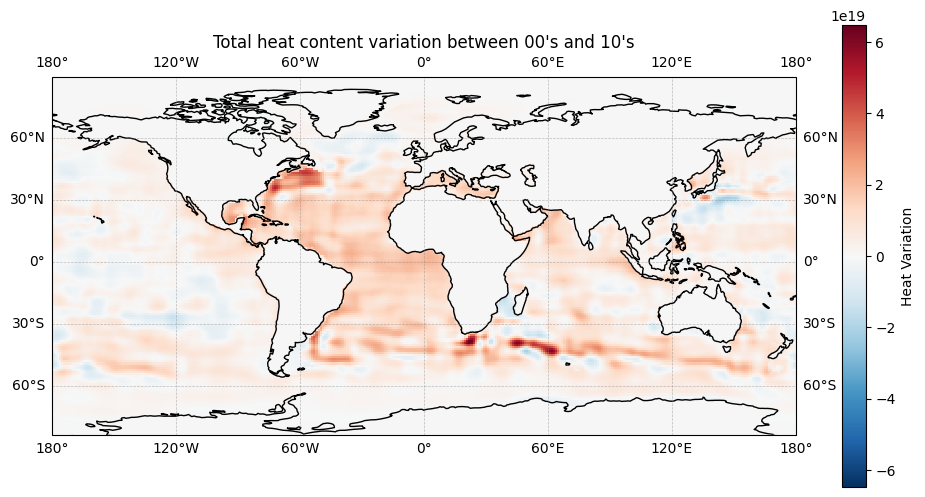

In [ ]:
# Plotting with coastlines using cartopy
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Plotting the heat variation
heat_variation.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'label': 'Heat Variation'})

# Adding coastlines
ax.add_feature(cfeature.COASTLINE)

# Adding gridlines
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

# Adding a title
plt.title('Total heat content variation between 00\'s and 10\'s')

# Show the plot
plt.show()

In [ ]:
# Function to plot the map of total heat variation
def plot(start_year):
    end_year = start_year + 4
    init = f'{start_year}-01-01'
    end = f'{end_year}-12-31'

    heat_content_00 = 1035 * 4186 * ds['temperature'].sel(time=slice('1955-01-01','1959-12-31')) * dV
    heat_content_10 = 1035 * 4186 * ds['temperature'].sel(time=slice(init,end)) * dV

    heat_content_00 = heat_content_00.mean(dim='time')
    heat_content_10 = heat_content_10.mean(dim='time')

    total_heat_content_00 = heat_content_00.sum(dim='depth')
    total_heat_content_10 = heat_content_10.sum(dim='depth')

    heat_variation = total_heat_content_10 -  total_heat_content_00

    # Plotting with coastlines using cartopy
    projection = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

    # Plotting the heat variation
    heat_variation.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'label': 'Heat Variation (J)'}, vmin = -9.4e19, vmax=9.4e19)

    # Adding coastlines
    ax.add_feature(cfeature.COASTLINE)

    # Adding a title
    plt.title(f'Total heat content variation {start_year}-{end_year + 1} (ref. to 1955-1960)')

    fig_width = 1200 / 100.0  # Width in inches (1200 pixels)
    fig_height = 600 / 100.0  # Height in inches (600 pixels)

    plt.savefig(f'plot{start_year}.png', dpi=100)

In [ ]:
# Loop through each time period
for start_year in range(1960, 2020, 5):
    print(start_year)
    plot(start_year)



















The cells above generated the images that were transformed to a gif using the website https://ezgif.com/maker, this is the result:

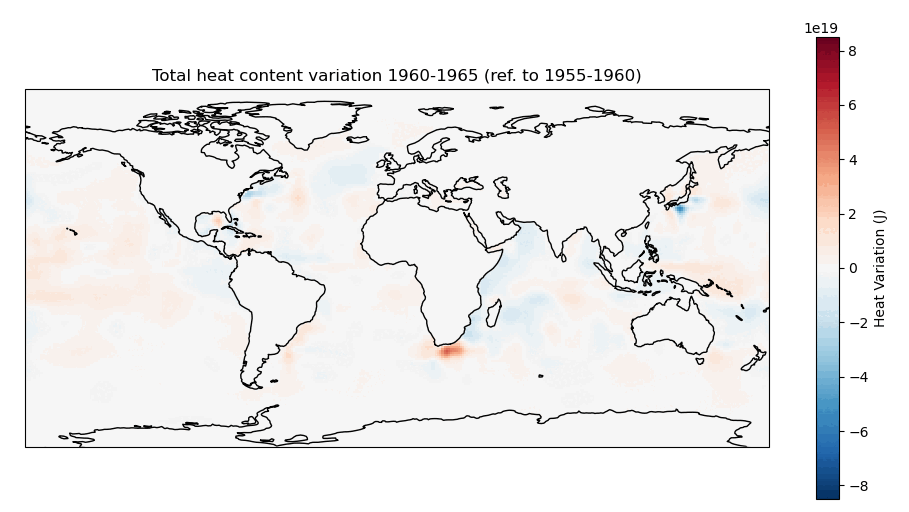